**IMPORT NECESSARY LIBRARIES**

In [76]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

**READ THE GIVEN IMAGE**

In [4]:
img  = cv2.imread("frame.jpg")

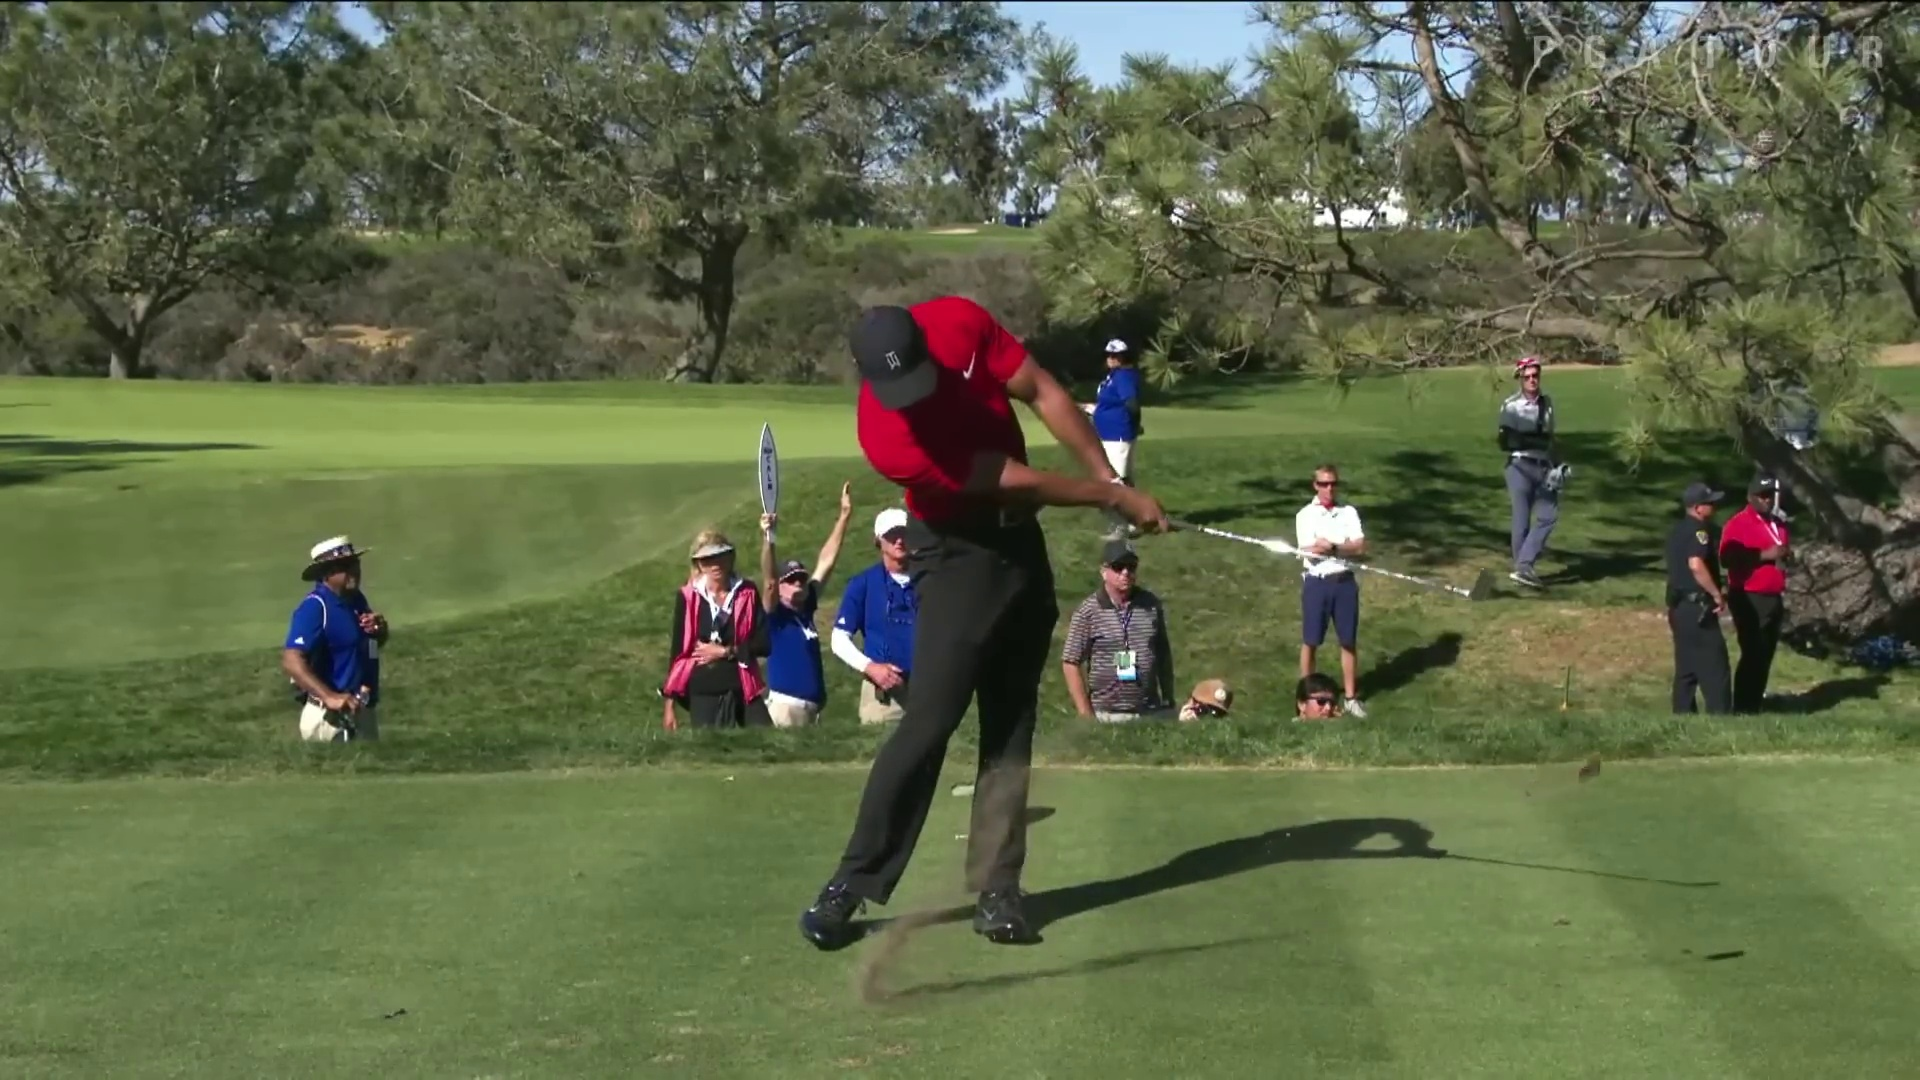

In [11]:
cv2_imshow(img)


**Converting RGB Image To GreyScale**

In [12]:
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

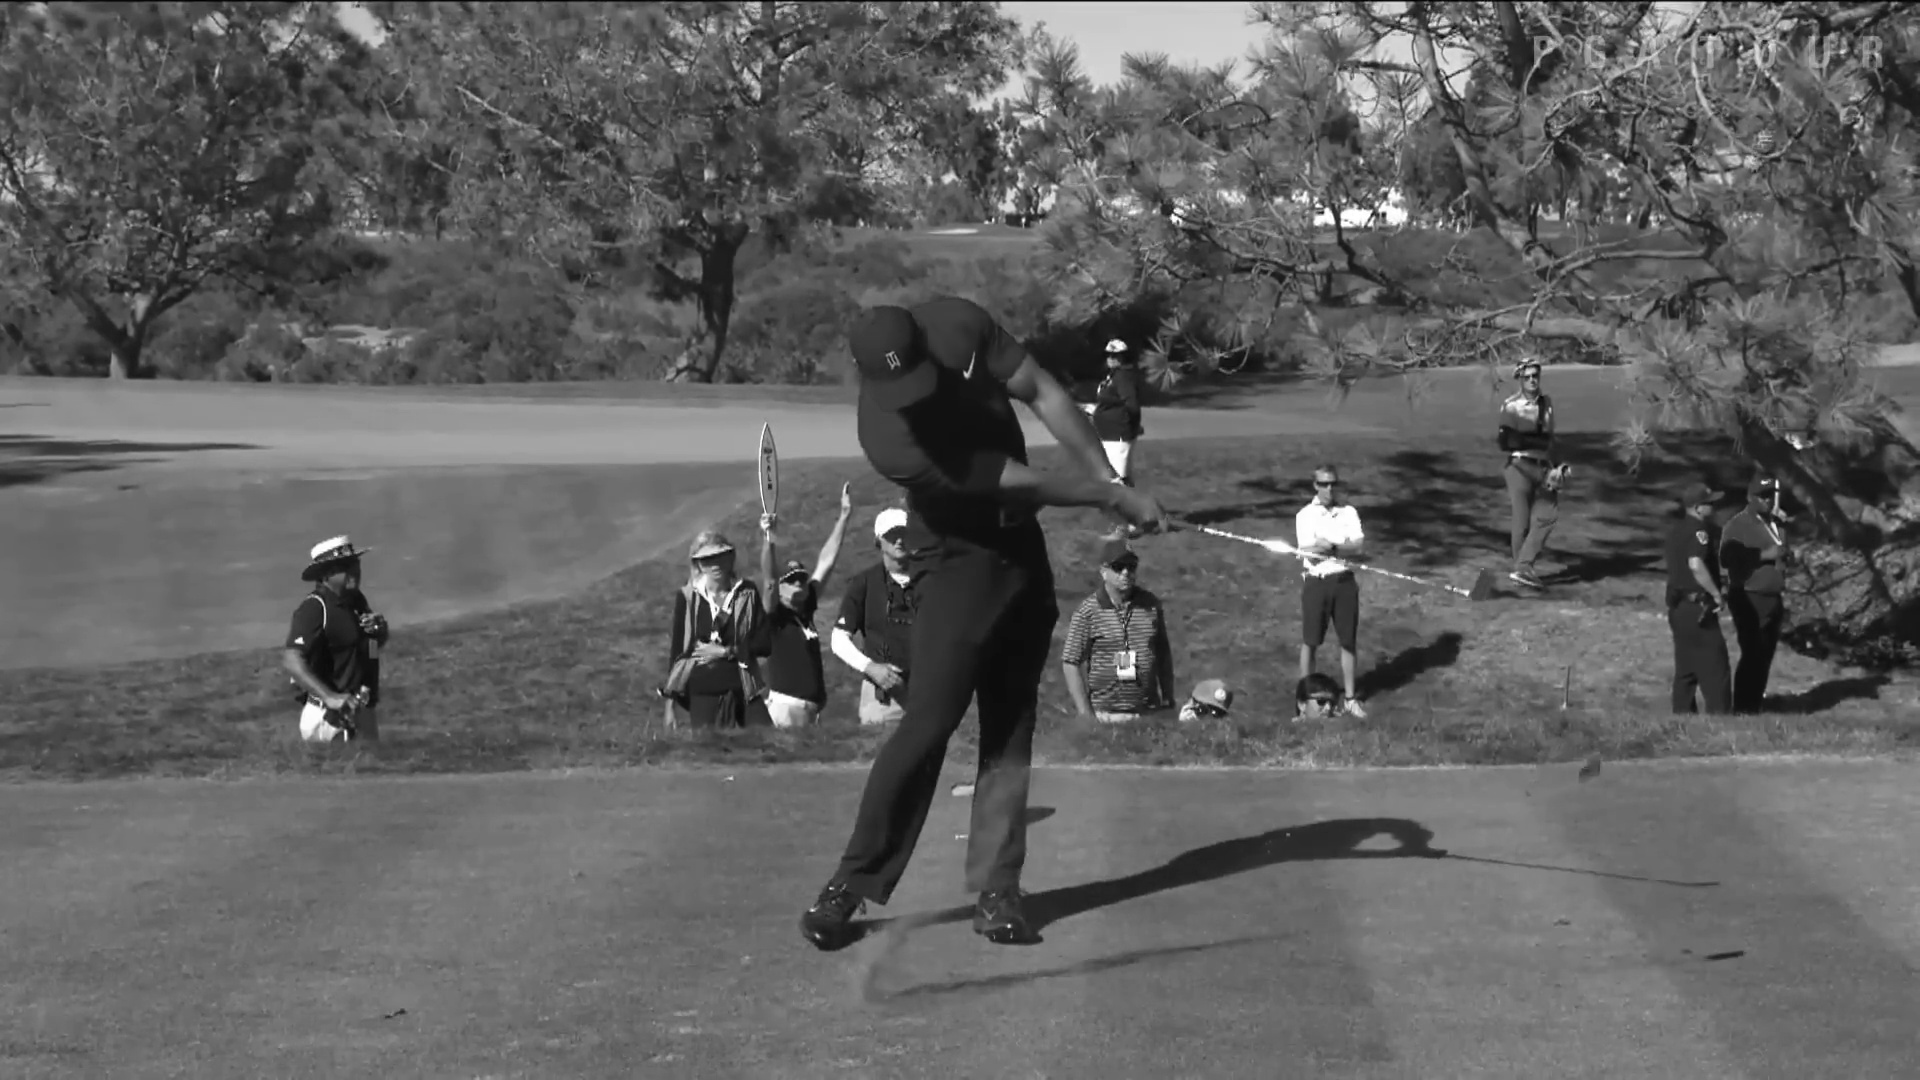

In [13]:
cv2_imshow(img_grey)

In [20]:
hei,width = img_grey.shape

**Resizing Image With Interpolation Technique**

In [21]:
hei,width

(1080, 1920)

In [22]:
aspect = hei/width

In [23]:
aspect

0.5625

In [33]:
w,h = 800,int(aspect*800)

In [34]:
resized_image = cv2.resize(img_grey,(h,w),interpolation = cv2.INTER_LINEAR)

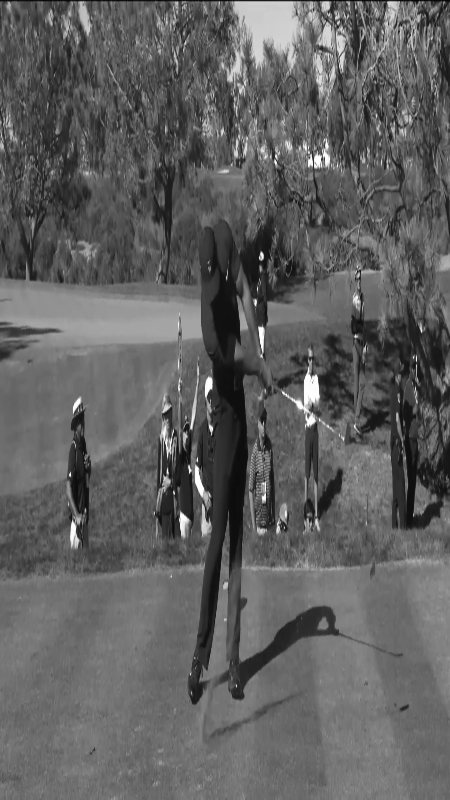

In [35]:
cv2_imshow(resized_image)

**Cropping Of image**

In [38]:
h,w = resized_image.shape
h,w

(800, 450)

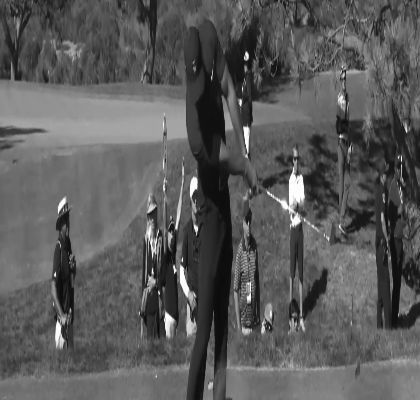

In [44]:
crop_width, crop_height = 420,400
centre_width, centre_height = w//2, h//2
startx = centre_width - crop_width//2
starty = centre_height - crop_height//2
centre_crop = resized_image[starty:starty+crop_height,startx:startx+crop_width]
cv2_imshow(centre_crop)

**Scaling For Converting the values Between 0 and 1**

In [51]:
centre_crop = centre_crop.astype(np.float32)
scaled_img = centre_crop/255.0

**Normalization**

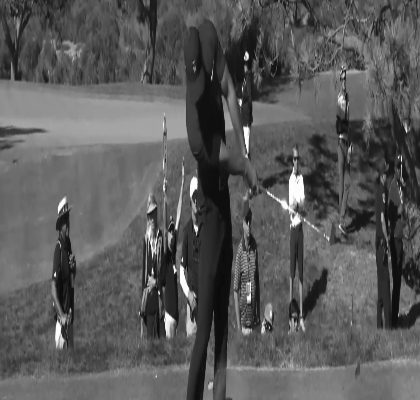

In [53]:
mean = 0.5
std = 0.2
# Normalization Formula
normalised_img = (scaled_img - mean)/std
revert_image = (normalised_img*std + mean)*255.0
cv2_imshow(revert_image)

**Data Augmentation**

**Import Library For Data Augmentation**

In [55]:
import imgaug.augmenters as iaa


In [63]:
augment= iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Affine(rotate=(-45,45)),
    iaa.Affine(shear=(-16,16),scale=(0.8,1.2))])


In [69]:
normalised_rgb = cv2.cvtColor(revert_image,cv2.COLOR_GRAY2RGB)

In [70]:
augmented_img = augment(image = normalised_rgb)

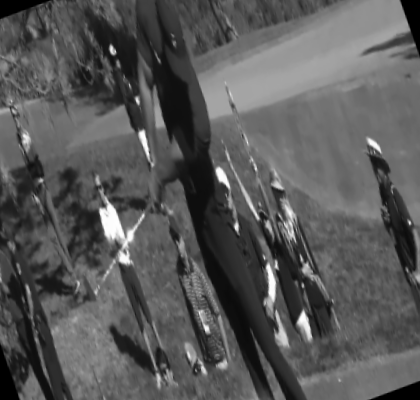

In [71]:
cv2_imshow(augmented_img)

**Blurring Of Image By Gaussian Blur Technique**

In [73]:
blurred_img = cv2.GaussianBlur(normalised_rgb,(5,5),0)


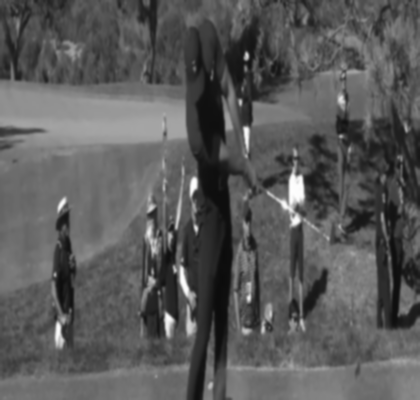

In [74]:
cv2_imshow(blurred_img)